### Importing required libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use("dark_background")

### Loading Dataset 

In [2]:
data = pd.read_csv("student_score.csv")

### Data Exploration and Understanding 

In [3]:
print(data.head()) # top-5 rows 
print("*" * 100)
print(data.tail()) # bottom-5 rows

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
# summary statistics of the dataset
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
data.describe(include = "object")

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
count,30641,28801,28796,30641,28811,29451,30010,29737,27507,29686
unique,2,5,6,2,2,4,3,2,2,3
top,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10
freq,15424,9212,6633,19905,18856,16844,15213,19082,16145,16246


In [6]:
# null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
# null values count
data.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
# removing unnecessary column from dataset 
data.drop(["Unnamed: 0"],axis = 1,inplace = True)

In [9]:
data.shape

(30641, 14)

In [10]:
data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

### Data Cleaning and Transformation

In [11]:
data.rename(columns = {"ParentEduc":"parent_education","WklyStudyHours":"weekly_std_hrs" }, inplace = True)

In [12]:
data.columns

Index(['Gender', 'EthnicGroup', 'parent_education', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'weekly_std_hrs', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

### Data Analysis and Visualization 

##### Gender Ratio/Distribution

In [13]:
# male-female count
Gender_ratio = data["Gender"].value_counts()
Gender_ratio

female    15424
male      15217
Name: Gender, dtype: int64

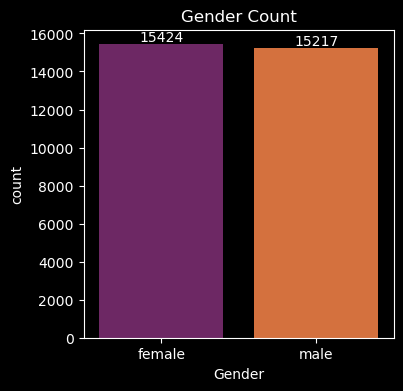

In [14]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Gender" , data = data , palette = "inferno")
ax.bar_label(ax.containers[0])# exact count 
plt.title("Gender Count")
plt.show()

In [15]:
# male-female percentage
data["Gender"].value_counts(normalize = True) * 100

female    50.337783
male      49.662217
Name: Gender, dtype: float64

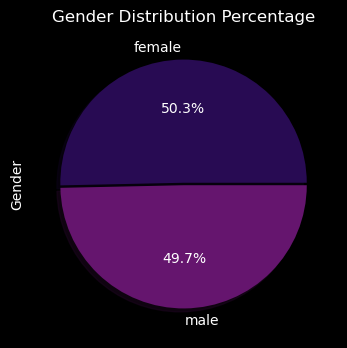

In [16]:
plt.figure(figsize=(4,4))
Gender_ratio.plot(kind = "pie",autopct = "%1.1f%%" , shadow = True , explode = (0.01,0.01) , colors = sns.color_palette("inferno"))
plt.title("Gender Distribution Percentage")
plt.show()

##### Interpretation : From above plots we analyzed that there is not much difference between the number of male and female students , however the count of female students are more as compared to men , female = 50.3% , male = 49.6%

##### Impact of Parent's Education on Student marks 

In [17]:
# data.groupby("parent_education")["MathScore","ReadingScore","WritingScore"].mean()
imp_pe = data.groupby("parent_education").agg({"MathScore" : "mean" ,"ReadingScore" : "mean" ,"WritingScore" : "mean"})
print(imp_pe)

                    MathScore  ReadingScore  WritingScore
parent_education                                         
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


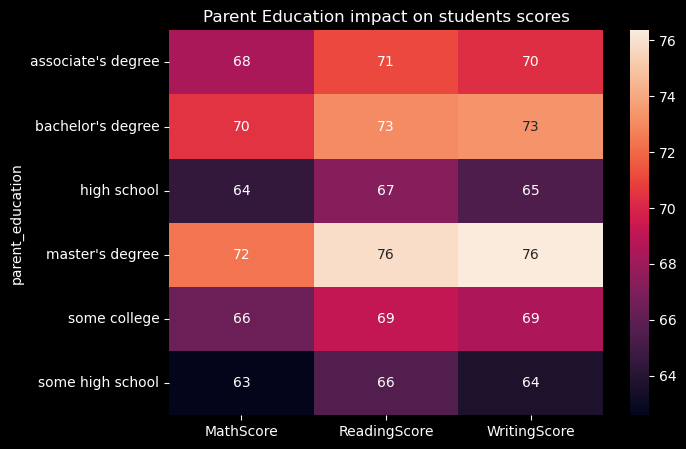

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(imp_pe , annot = True)
plt.title("Parent Education impact on students scores")
plt.show()

##### Interpretation : The above heatmap shows that the parent's education has the greater impact on student marks.The parents who have pursued "master's degree" there children average marks are (72,76,76) while the parent's who only studied till "high school" there children average marks are (63,66,64), it shows that higher the parent's education refers to higher the student marks.


##### Impact of Parent's Marital Status on Student marks 

In [19]:
imp_pms =data.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(imp_pms)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


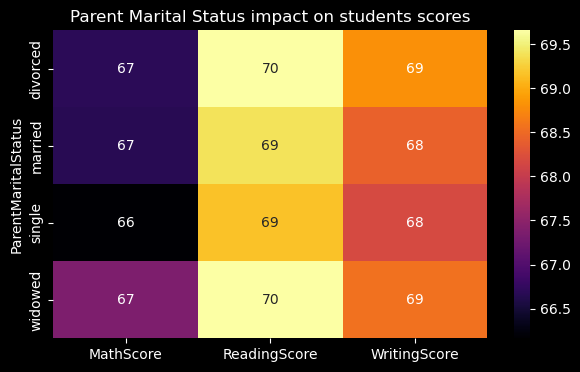

In [20]:
plt.figure(figsize=(7,4))
sns.heatmap(imp_pms , annot = True , cmap = "inferno")
plt.title("Parent Marital Status impact on students scores")
plt.show()

##### Interpretation : The above heatmap shows that the Parent's Marital status have no (negligible) impact on students marks.

##### Impact of Sports on student marks

In [21]:
imp_sp = data.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(imp_sp)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


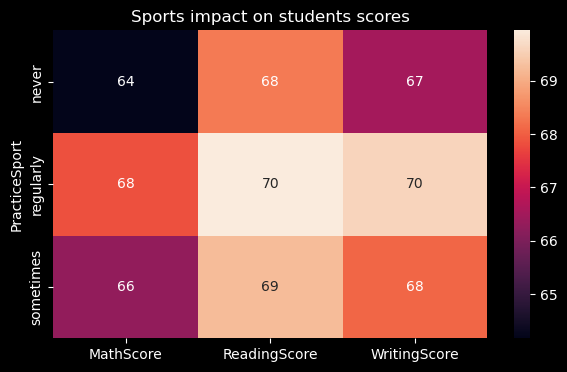

In [22]:
plt.figure(figsize=(7,4))
sns.heatmap(imp_sp , annot = True)
plt.title("Sports impact on students scores")
plt.show()

##### Interpretation : The above heatmap shows that "practice sport" doesn't create a major impact on student marks but from above plot we concluded that the students who play games/sports regularly or sometimes have higher average score in all the subjects as compared to the students who never play any sports. It means playing sports regularly or sometimes keeps them physically fit and helps them achieving good marks in each subject.

##### Impact of (weekly study hours) studying time on student marks 

In [23]:
imp_st = data.groupby("weekly_std_hrs").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(imp_st)

                MathScore  ReadingScore  WritingScore
weekly_std_hrs                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


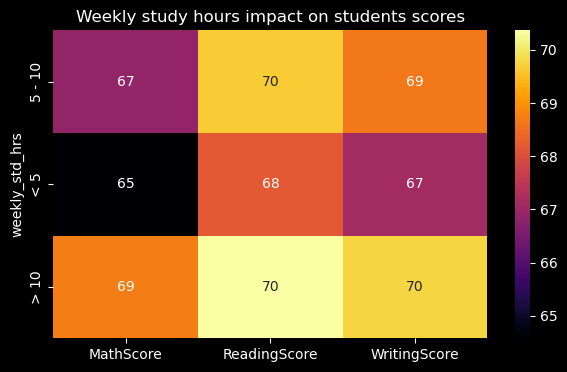

In [24]:
plt.figure(figsize=(7,4))
sns.heatmap(imp_st , annot = True , cmap="inferno") 
plt.title("Weekly study hours impact on students scores")
plt.show()

##### Interpretation : The above heatmap shows that "weekly study hours" doesn't create a major impact on student marks but from above plot we concluded that the students who studies more than 10 hours or studying 5 to 10 hours weekly have higher average score in all the subjects as compared to the students who studies for less than 5 hours weekly. It means studying for 5 to 10 hours weekly is sufficient for achieving good marks.

##### Impact of Ethnic Groups on students scores

In [25]:
imp_ethn_grp =data.groupby("EthnicGroup").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(imp_ethn_grp)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


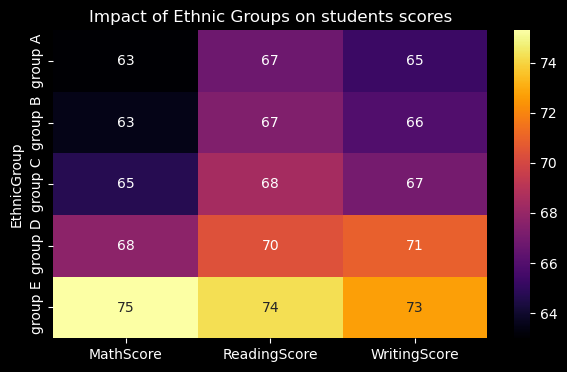

In [26]:
plt.figure(figsize=(7,4))
sns.heatmap(imp_ethn_grp , annot = True , cmap="inferno") 
plt.title("Impact of Ethnic Groups on students scores")
plt.show()

##### Interpretation : The above heatmap shows that the students of "Ethnic group E" has scored highest marks in all the subjects as compared to other Ethnic group students.

##### Detecting outliers and extreme values in dataset

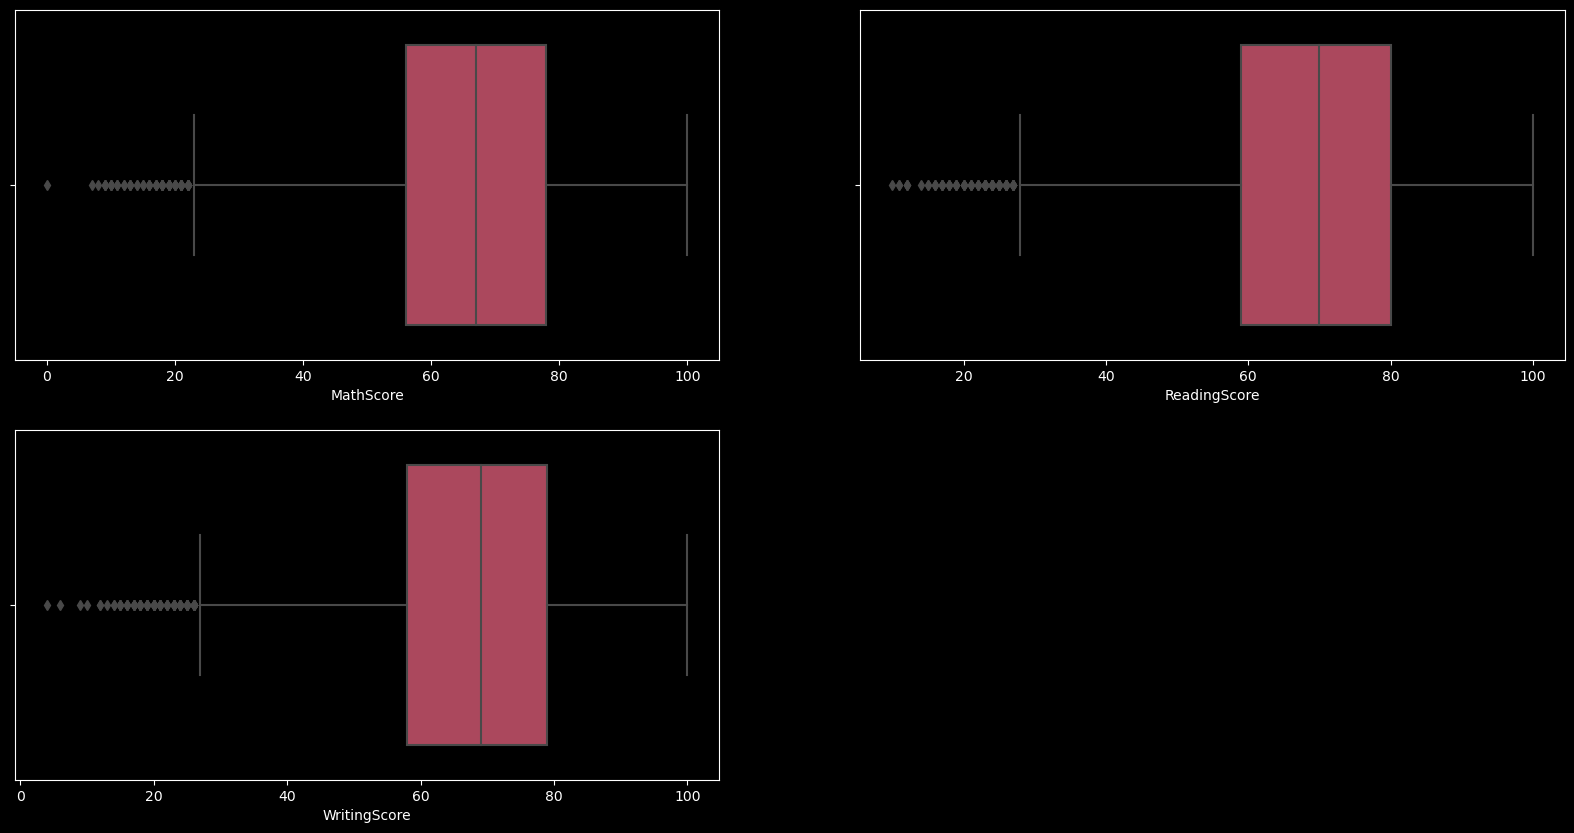

In [27]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(x = "MathScore" , data = data , palette="inferno")

plt.subplot(2,2,2)
sns.boxplot(x = "ReadingScore" , data = data , palette = "inferno")

plt.subplot(2,2,3)
sns.boxplot(x = "WritingScore" , data = data  , palette = "inferno")

plt.show()

##### interpretation : From above plot we can interpret that Maths is comparatively difficult subject to score as compared to reading and writing.

##### Distribution of Ethnic groups 

In [28]:
print(data["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [29]:
group_A  = data[data["EthnicGroup"]=="group A"].count()
#group_A = data.loc[data["EthnicGroup"]=="group A"].count()
print(group_A)
print("group A Ethnic group count = " ,group_A["EthnicGroup"])

Gender                 2219
EthnicGroup            2219
parent_education       2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
weekly_std_hrs         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64
group A Ethnic group count =  2219


[2219, 5826, 9212, 7503, 4041]


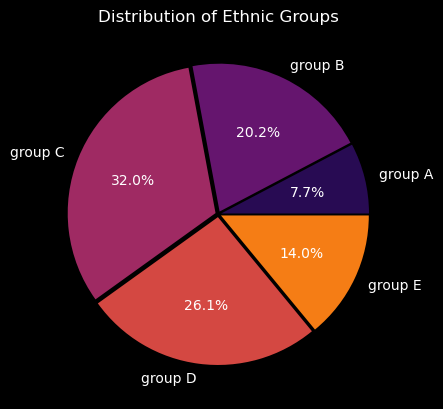

In [30]:
group_A =data[data["EthnicGroup"]=="group A"].count()
group_B =data[data["EthnicGroup"]=="group B"].count()
group_C =data[data["EthnicGroup"]=="group C"].count()
group_D =data[data["EthnicGroup"]=="group D"].count()
group_E =data[data["EthnicGroup"]=="group E"].count()

lst = [group_A["EthnicGroup"],group_B["EthnicGroup"],group_C["EthnicGroup"],group_D["EthnicGroup"],group_E["EthnicGroup"]]
print(lst)
labels = ["group A","group B","group C","group D","group E"]
plt.pie(lst , labels = labels , colors = sns.color_palette("inferno") , autopct= "%1.1f%%" , explode=(0.02,0.02,0.02,0.02,0.02))
plt.title("Distribution of Ethnic Groups")
plt.show()

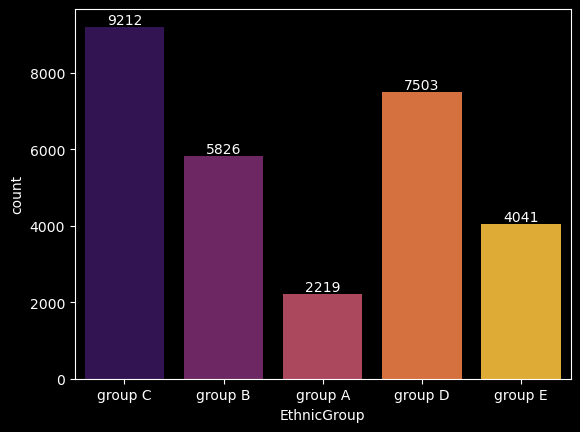

In [31]:
plot =sns.countplot(data = data ,x = "EthnicGroup" , palette="inferno" )
plot.bar_label(plot.containers[0])
plt.show()

##### Interpretation : Group C has the highest count among all the Ethnic Groups , it means most of the students are from Ethnic group C

In [32]:
imp_ethn_grp =data.groupby("EthnicGroup").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(imp_ethn_grp)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060
